# Final Project: Predicting Wine Qualities

### Submitted by: Shruti Chaturvedi

### Load and read the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("winequality.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Preprocessing: We will now be analysing data: finding null, duplicate, missing values and checking the distribution

In [3]:
print('Unique values in quality are: ' , df['quality'].unique())

Unique values in quality are:  [5 6 7 4 8 3]


In [4]:
#counting the unique values
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

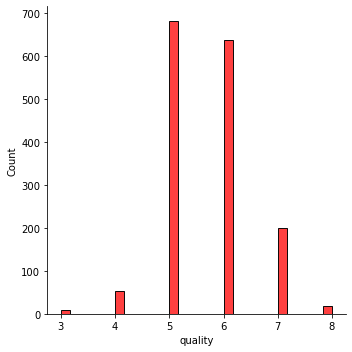

In [5]:
sns.displot(df, x="quality", color='r')

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.duplicated().sum()

240

In [9]:
df_duplicate = df.loc[df.duplicated(),:]
df_duplicate['quality'].value_counts()

5    104
6    103
7     32
8      1
Name: quality, dtype: int64

In [10]:
#Drops all but the first duplicate, matched across all columns by default
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


#### Findings:
1. There is unequal distribution of labels: particularly wines with quality 3,4 and 8 are considerably few than 5,6,7. This will affect the data we have and also the is an example of undersampling of certain labels in comparison with others as this data does not accurately represent information to discern differences if different wine qualities.

2. There is no null value

3. There are 240 duplicate values most duplicated values are in laebl 5 followed by 6 and 7. Since there is more samples for these labels, we can drop them easily

4. The distribution is almost varied for features but most features follow a gausssian distriution, we will see that in distplots

In [12]:
#correaltion matrix to drop some features which are non-relevant for telling quality
corr_matrix = df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


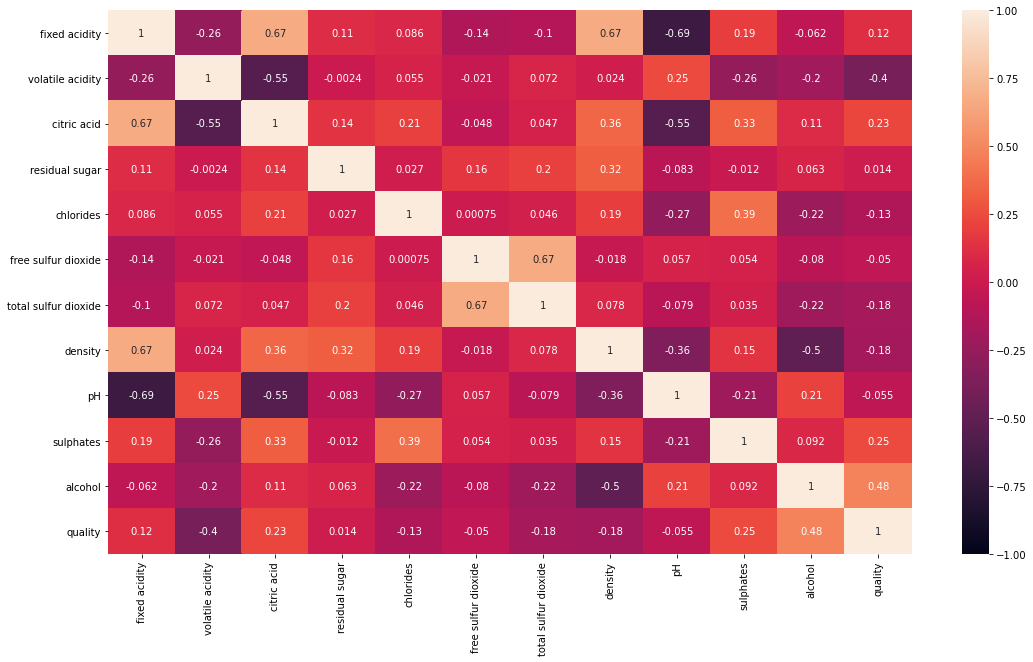

In [13]:
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.show()

In [14]:
#dropping features which do not convey as much information:
df = df.drop(columns=['residual sugar','free sulfur dioxide'])
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4,5


#### We will now use various distribution plots to understand the distribtuion of features for various labels

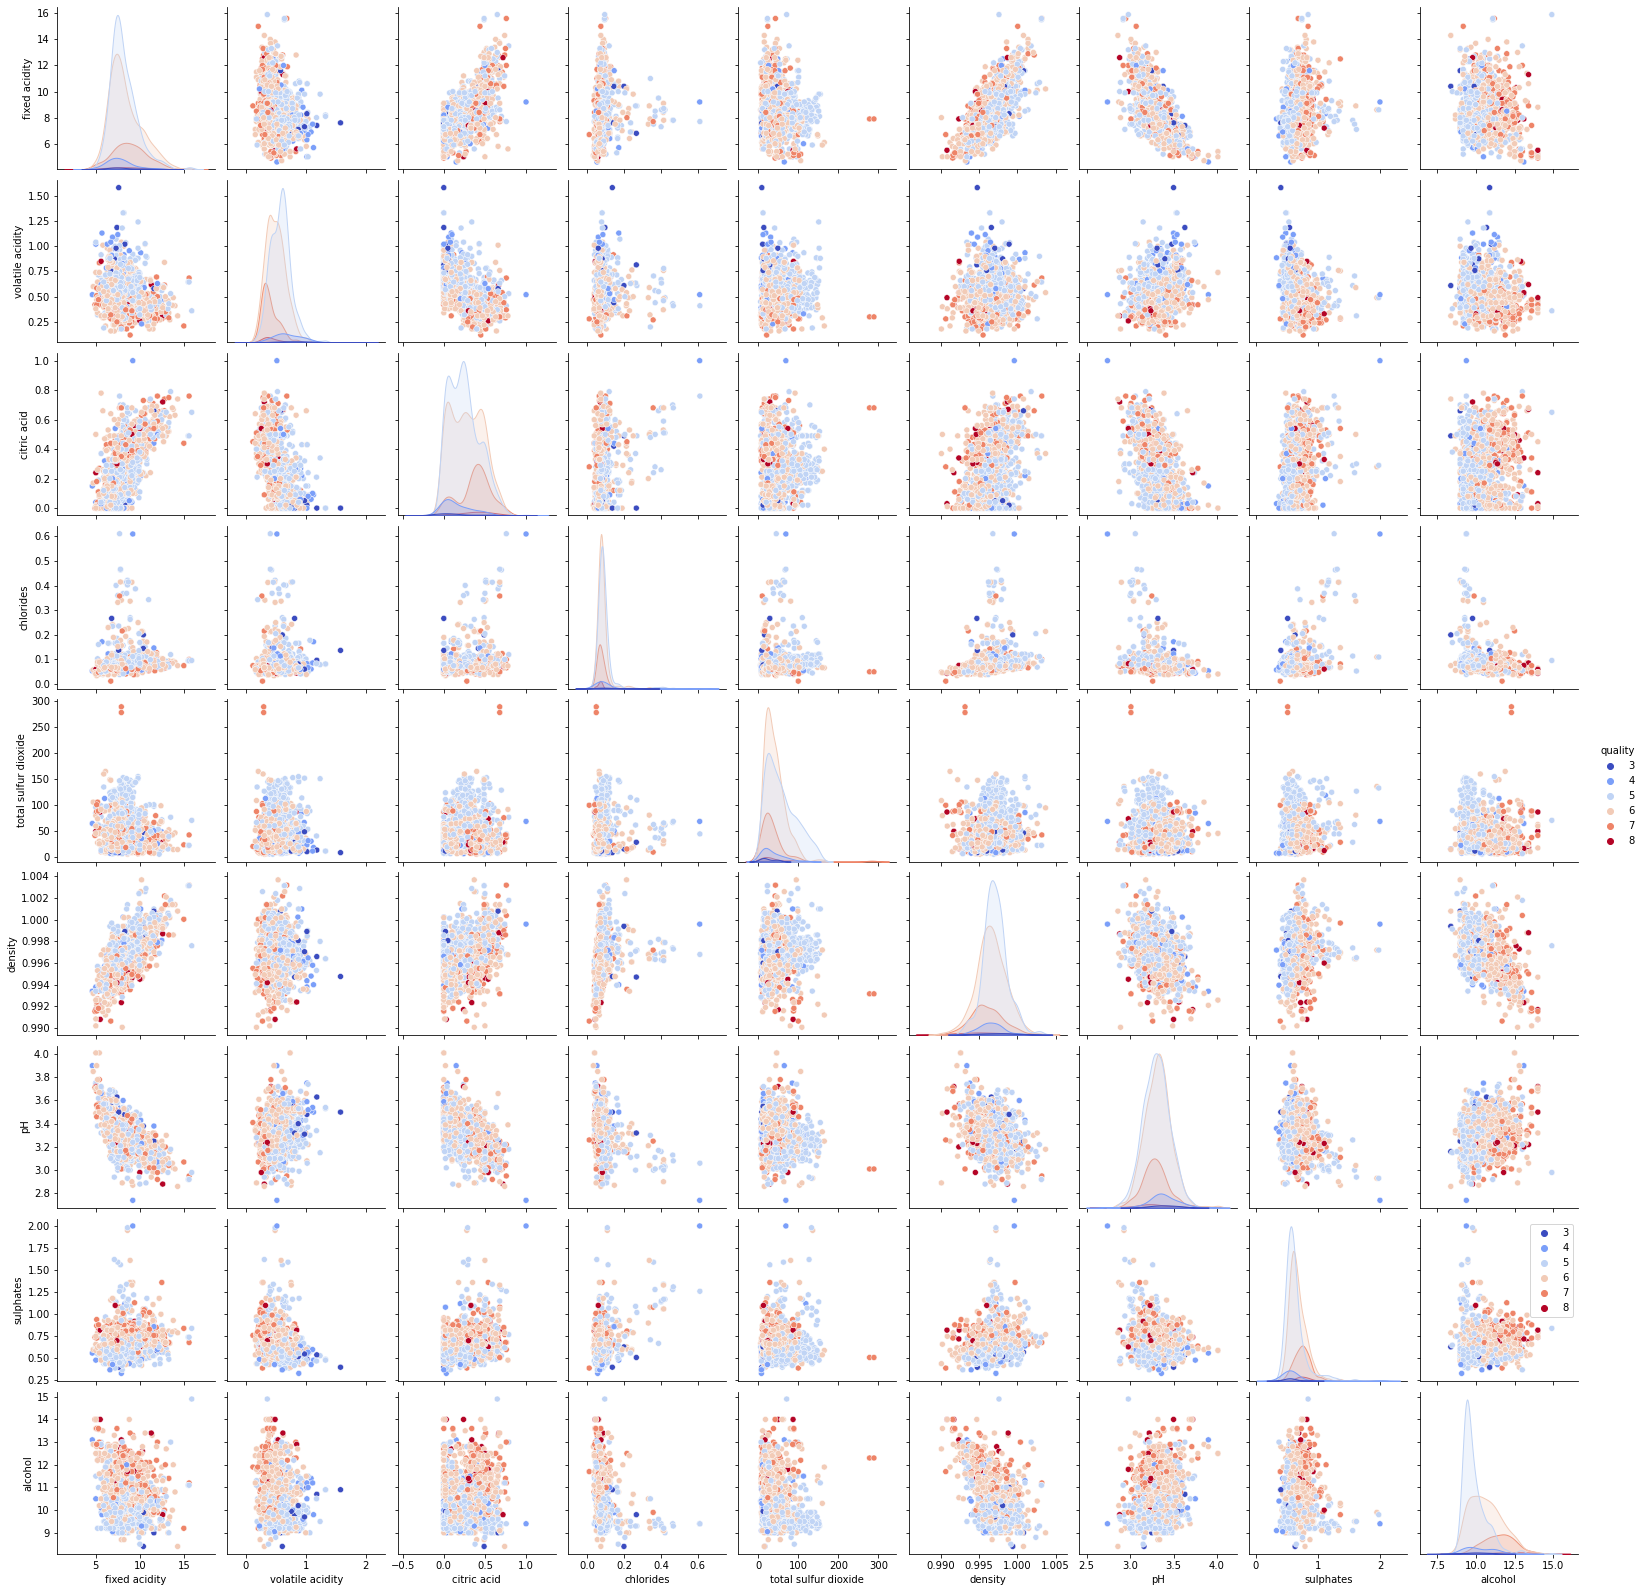

In [15]:
#Pair plot to understand relation bw features and labels
sns.pairplot(df, hue ="quality", palette ='coolwarm')
plt.legend()
plt.show()

In [16]:
columns = df.columns.tolist()
features = columns[0:9]
labels = df['quality'].unique()
print(f'The features used for modelling are: {features} and the labels for quality here are {labels}')


The features used for modelling are: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] and the labels for quality here are [5 6 7 4 8 3]


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

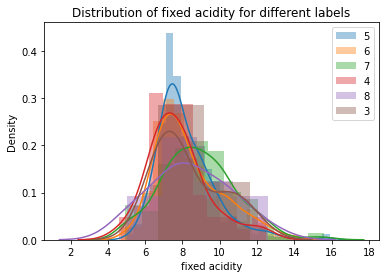

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

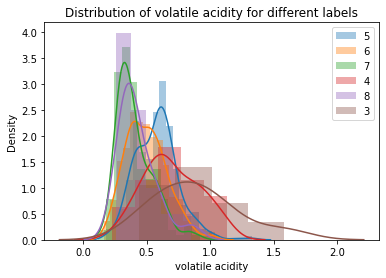

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

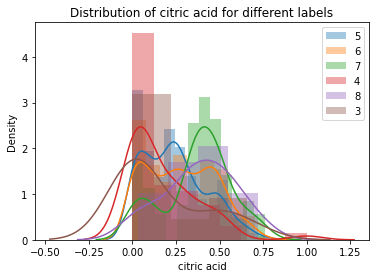

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

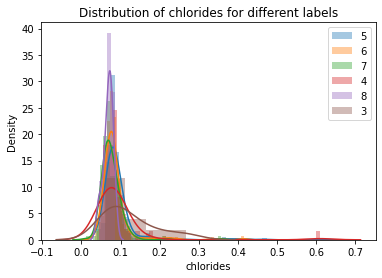

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

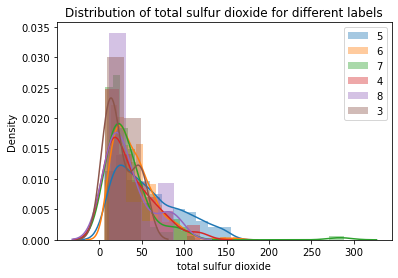

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

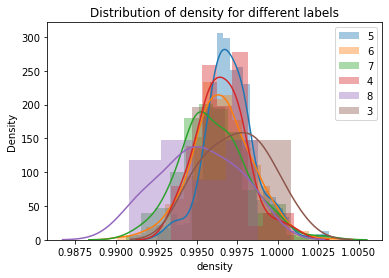

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

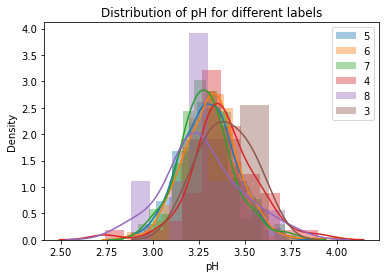

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

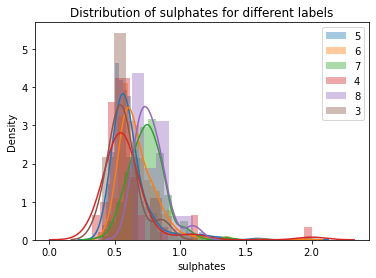

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

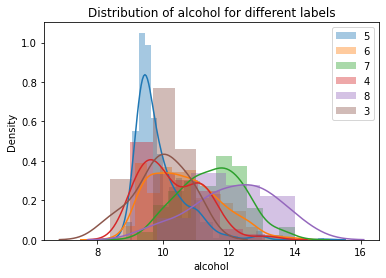

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


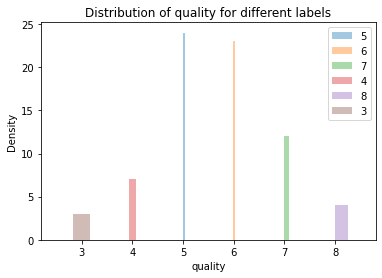

In [17]:
#Dist plot to see what values each label has for different features
for column in columns:
    for label in labels:
        sns.distplot(df.loc[df['quality'] == label, column], label = label)
    plt.title('Distribution of ' + column + ' for different labels')
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


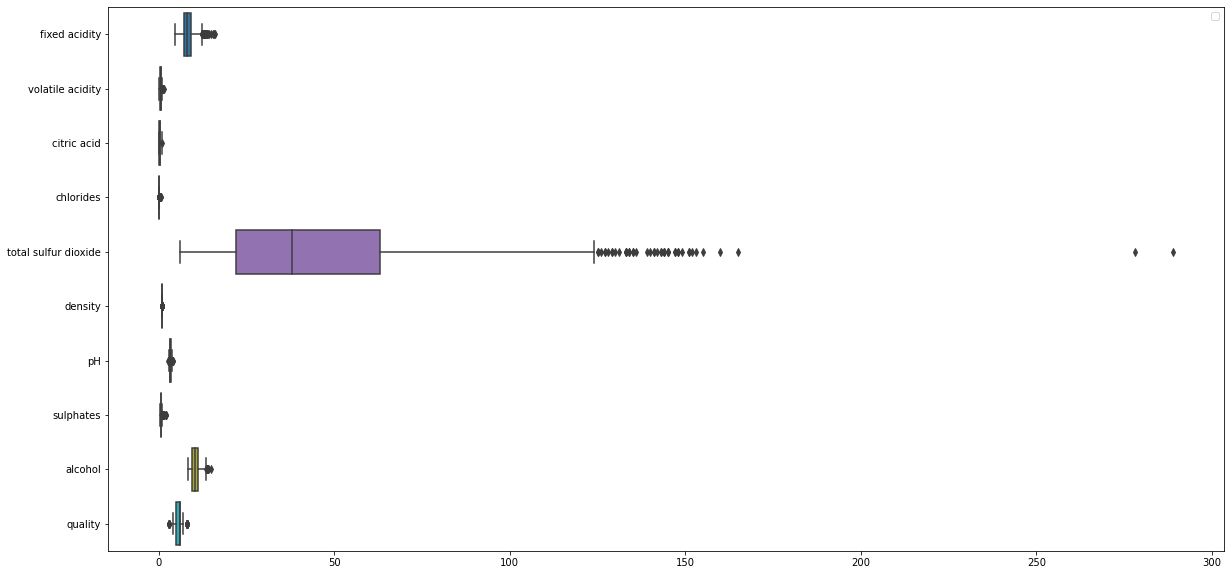

In [18]:
#Box plot to understand the presence of outliers and see the general distribution
plt.figure(figsize=(20,10))
sns.boxplot(data = df, orient = 'h')
plt.legend()
plt.show()

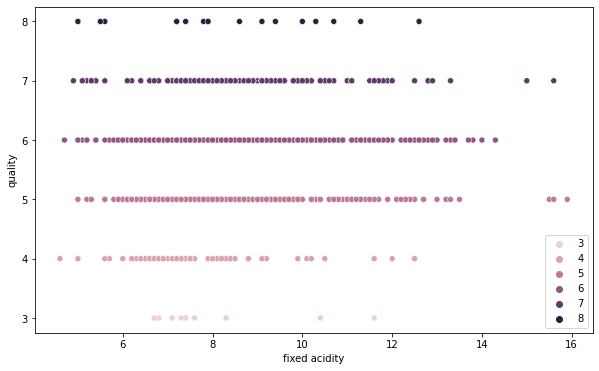

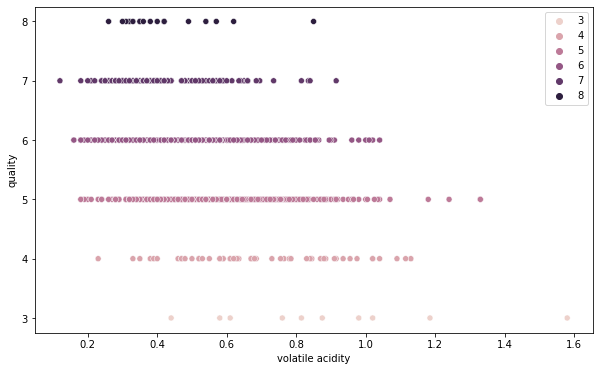

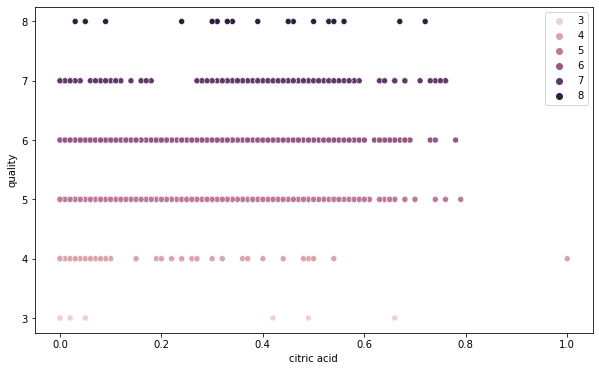

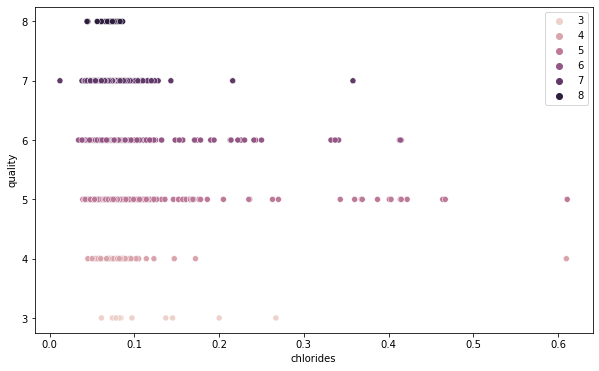

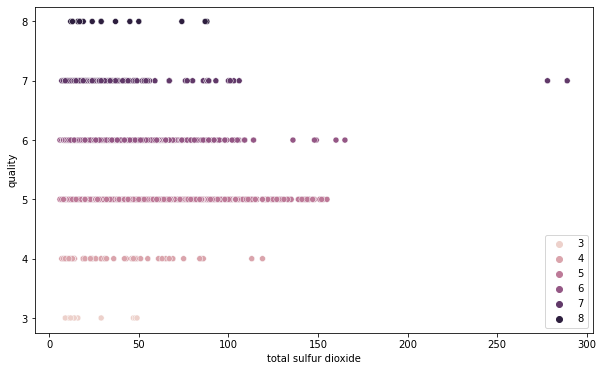

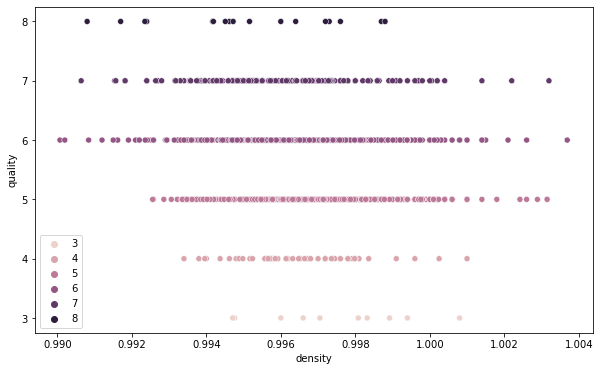

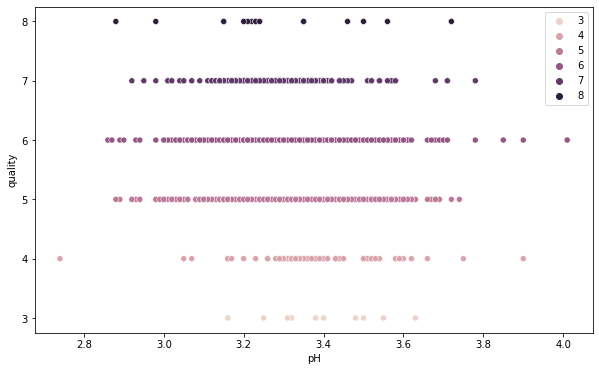

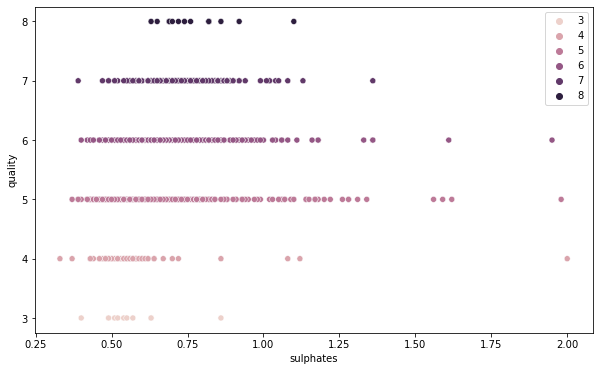

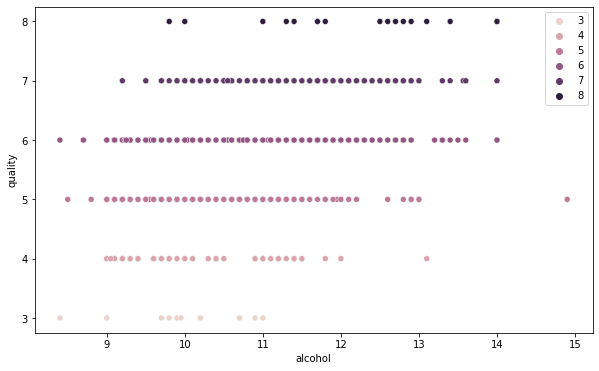

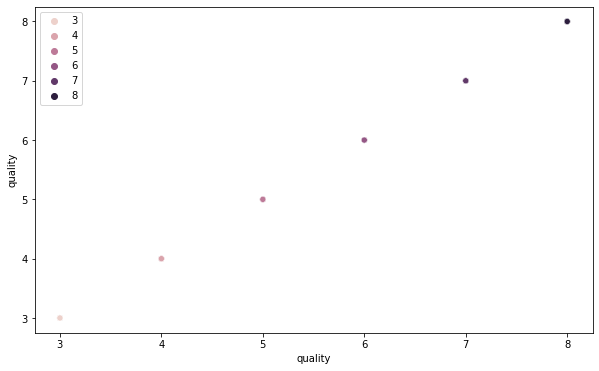

In [19]:
#scatter plot to see how for each label, each feature is spread out
for column in columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=column,y='quality', hue="quality")
    plt.legend()
    plt.show()

#### Findings:
1. We can see through the various plots, that there is no one clear feature which can easily discern the quality. 
2. The distribution of features for different labels seems uniform across labels

## Modelling: Split the data and run the model

#### We will try and see how scaling data in tree-algorithms does not affect performance. We run the model on both scaled and non-scaled data for testing

#### Also since our data is not uniformly distributed across labels, we will use metrics other than accuracy to decide the best performing model with the most discernible quality

In [20]:
#We will try running the model on scaled and non-scaled data.
#Splitting the data:
from sklearn.model_selection import train_test_split


In [21]:
#Seperating the feature and label data
X = df.iloc[:,:9]
y = df.iloc[:,9]

In [22]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
print(f'The shape of training set is {X_train.shape} and the shape of testing set is {X_test.shape}')

The shape of training set is (951, 9) and the shape of testing set is (408, 9)


In [23]:
#For testing Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

#### Training and testing Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8, splitter = 'random', max_features = 6, criterion = 'gini', random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.658254468980021
Accuracy of test: 0.5661764705882353


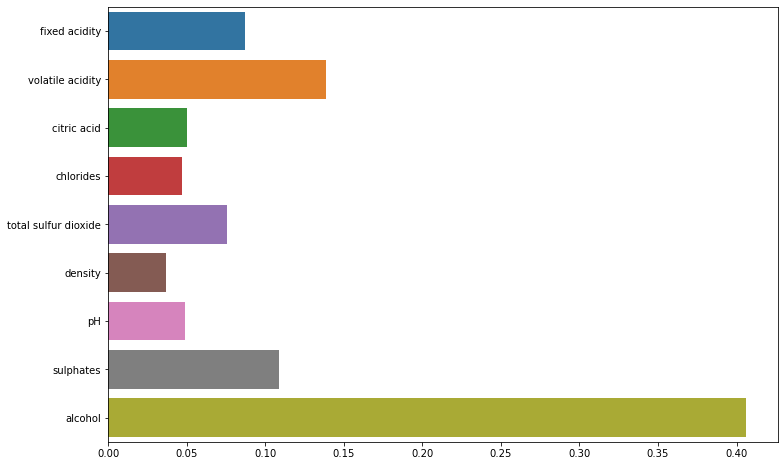

In [25]:
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [26]:
#Decision Tree with Entropy
clf_2 = DecisionTreeClassifier(max_depth = 12, splitter = 'random', criterion = 'entropy', random_state = 42)
clf_2.fit(X_train,y_train)
print("Accuracy of train:",clf_2.score(X_train,y_train))
print("Accuracy of test:",clf_2.score(X_test,y_test))

Accuracy of train: 0.85068349106204
Accuracy of test: 0.5171568627450981


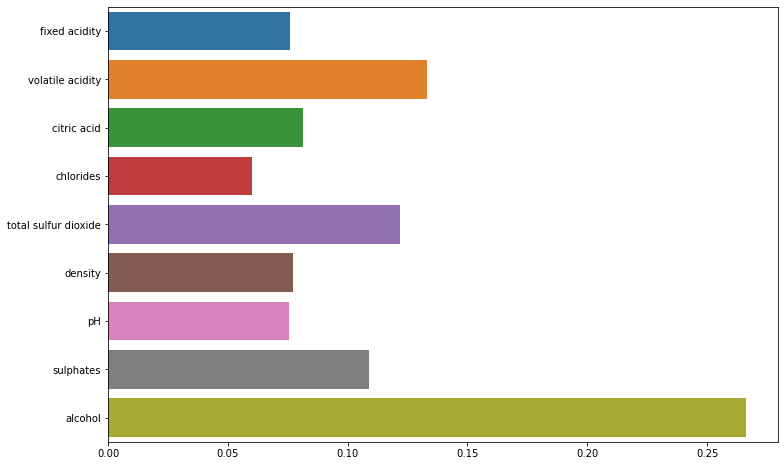

In [27]:
plt.figure(figsize=(12, 8))
importance = clf_2.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [28]:
#seeing if scaling affects performance; this classifier is the same as 1st but uses scaled features instead
clf_3 = DecisionTreeClassifier(max_depth = 8, splitter = 'random', max_features = 6, criterion = 'gini', random_state = 42)
clf_3.fit(X_train_scaled,y_train)
print("Accuracy of train:",clf_3.score(X_train_scaled,y_train))
print("Accuracy of test:",clf_3.score(X_test_scaled,y_test))

Accuracy of train: 0.658254468980021
Accuracy of test: 0.5661764705882353


In [29]:
y_pred_1 = clf.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
y_pred_3 = clf_3.predict(X_test_scaled)

## Evaluation: Checking different metrics for the 3 different decision Tree classifiers

In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# Metrics for decision Tree
print("Precision for Decision Tree Classifier #1= {}".format(precision_score(y_test, y_pred_1, average='macro')))
print("Recall for Decision Tree Classifier #1= {}".format(recall_score(y_test, y_pred_1, average='macro')))
print("Accuracy for Decision Tree Classifier #1= {}".format(accuracy_score(y_test, y_pred_1)))
print("F1 Score for Decision Tree Classifier #1= {}".format(f1_score(y_test, y_pred_1,average='macro')))
print('\n')
print("Precision for Decision Tree Classifier #2= {}".format(precision_score(y_test, y_pred_2, average='macro')))
print("Recall for Decision Tree Classifier #2= {}".format(recall_score(y_test, y_pred_2, average='macro')))
print("Accuracy for Decision Tree Classifier #2= {}".format(accuracy_score(y_test, y_pred_2)))
print("F1 Score for Decision Tree Classifier #2= {}".format(f1_score(y_test, y_pred_2,average='macro')))
print('\n')
print("Precision for Decision Tree Classifier #3= {}".format(precision_score(y_test, y_pred_3, average='macro')))
print("Recall for Decision Tree Classifier #3= {}".format(recall_score(y_test, y_pred_3, average='macro')))
print("Accuracy for Decision Tree Classifier #3= {}".format(accuracy_score(y_test, y_pred_3)))
print("F1 Score for Decision Tree Classifier #3= {}".format(f1_score(y_test, y_pred_3,average='macro')))

Precision for Decision Tree Classifier #1= 0.2990486491727187
Recall for Decision Tree Classifier #1= 0.2898776124612767
Accuracy for Decision Tree Classifier #1= 0.5661764705882353
F1 Score for Decision Tree Classifier #1= 0.2922388816616321


Precision for Decision Tree Classifier #2= 0.30806950268867983
Recall for Decision Tree Classifier #2= 0.30126539843215966
Accuracy for Decision Tree Classifier #2= 0.5171568627450981
F1 Score for Decision Tree Classifier #2= 0.30418667603224436


Precision for Decision Tree Classifier #3= 0.2990486491727187
Recall for Decision Tree Classifier #3= 0.2898776124612767
Accuracy for Decision Tree Classifier #3= 0.5661764705882353
F1 Score for Decision Tree Classifier #3= 0.2922388816616321


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Findings:
1. For the decision tree classifier,  models with the same hyperparameters but different scaled features had the same accuracy
2. The models are performing poorly, since there is not a very clear discerning criteria for the labels based on our features
3. Also, training results seem to be better than testing, there is slight overfitting

### We will now test a bagging algorithm: Random Forest Classifier

In [31]:
#We now will try a bagging algorithm: Rnadom Forest Classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 70, criterion = 'entropy', max_depth = 8, max_features='sqrt', random_state=42)
rfc.fit(X_train, y_train)
print("Mean Accuracy of train:",rfc.score(X_train,y_train))
print("Mean Accuracy of test:",rfc.score(X_test,y_test))

Mean Accuracy of train: 0.886435331230284
Mean Accuracy of test: 0.6078431372549019


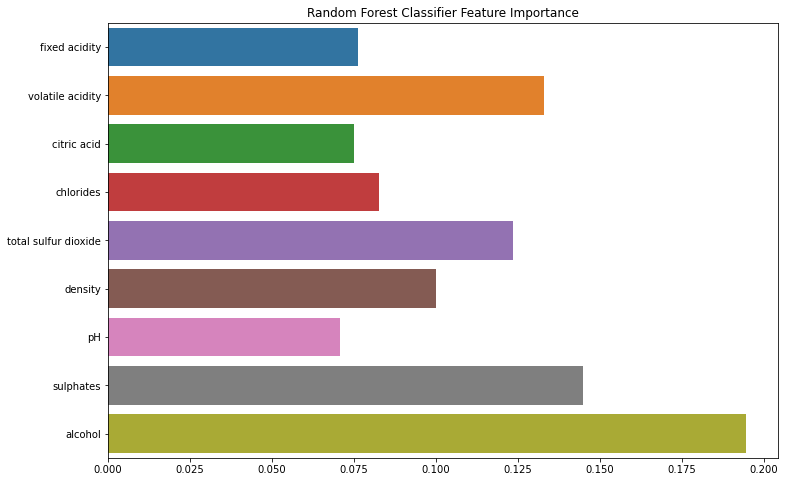

In [32]:
plt.figure(figsize=(12, 8))
importance = rfc.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title('Random Forest Classifier Feature Importance')
plt.show()

In [33]:
y_pred_rfc = rfc.predict(X_test)

## Evaluation: Random Forest Classifier

In [34]:
print("Precision for Random Forest is {}".format(precision_score(y_test, y_pred_rfc, average='macro')))
print("Recall for Random Forest is= {}".format(recall_score(y_test, y_pred_rfc, average='macro')))
print("Accuracy for Random Forest is= {}".format(accuracy_score(y_test, y_pred_rfc)))
print("F1 Score for Random Forest is= {}".format(f1_score(y_test, y_pred_rfc,average='macro')))

Precision for Random Forest is 0.2986538023679417
Recall for Random Forest is= 0.2879258839100019
Accuracy for Random Forest is= 0.6078431372549019
F1 Score for Random Forest is= 0.28885095537139893


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Findings:
1. Random Forest seems to do better than a regular decision tree, although not perfectly better. This is the cause of the disparity in data and also the features being almost non-discernible.
2. There is overfitting as the mean accuracy of training is so much better than that of testing

### Trying a boosting algorithm: XGBoost

This algorithm uses data lables ranging from 0 to num_classes - 1, so we will change our labels to go from 0 to 5 (total 6 classes) where 0 = 3, 1 = 4 and so on

In [35]:
y_train_xgb = y_train - 3
y_test_xgb = y_test - 3

In [36]:
#We will also try a boosting algorithm: XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train_xgb)
dtest = xgb.DMatrix(X_test, label = y_test_xgb)

In [37]:
param = {'max_depth':12, 
         'eta':0.08,  
         'objective':'multi:softprob',
         'eval_metric':'mlogloss',
         'num_class':6
         }
runs = 200
xgb_model = xgb.train(param, dtrain, runs)


In [38]:
y_predict = xgb_model.predict(dtest)
best_predict = np.asarray([np.argmax(line) for line in y_predict])
best_predict

array([2, 3, 3, 2, 1, 4, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 4, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 2, 3, 2, 2, 2, 2, 3, 2, 4, 2, 3,
       2, 2, 4, 4, 2, 5, 3, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       3, 3, 3, 2, 2, 2, 3, 3, 2, 4, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3,
       3, 3, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 4, 3, 3, 2, 2, 2, 4, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2,
       3, 3, 2, 2, 4, 4, 3, 3, 3, 4, 2, 3, 2, 2, 4, 3, 4, 3, 2, 3, 4, 2,
       2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 4, 2, 2, 3, 3, 2,
       3, 3, 2, 4, 2, 4, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2, 4, 4, 2, 3,
       2, 4, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 4, 3, 3, 2, 2, 2, 3,
       3, 3, 3, 2, 2, 3, 3, 4, 3, 2, 4, 3, 3, 4, 2, 2, 3, 1, 4, 3, 2, 2,
       3, 3, 3, 4, 2, 3, 3, 2, 4, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 2, 4, 2, 2, 2,

## Evaluation: XGBoost Classifier

In [39]:
print("Precision of the XGBoost Classifier = {}".format(precision_score(y_test_xgb, best_predict, average='macro')))
print("Recall of the XGBoost Classifier = {}".format(recall_score(y_test_xgb, best_predict, average='macro')))
print("Accuracy of the XGBoost Classifier= {}".format(accuracy_score(y_test_xgb, best_predict)))
print("F1 Score for Random Forest is= {}".format(f1_score(y_test_xgb, best_predict,average='macro')))

Precision of the XGBoost Classifier = 0.2995880708341534
Recall of the XGBoost Classifier = 0.2846753057870471
Accuracy of the XGBoost Classifier= 0.571078431372549
F1 Score for Random Forest is= 0.28848996286563416


#### Findings:
1. The metrics suggest that XGBoost performs almost the same as other algorithms. With certain hyperparameter tuning, I was able to get slightly better scores, but around the same range. 

#### It seems that these models do not have the right amount of data and the correct discerning features to make accurate decisions. 

#### From the EDA, we see that features are evenly distributed across the different labels. 

#### We also saw that certain labels are more commonly present than certain other, so there is undersampling of labels 3, 4 and 8 in comparison to other labels 

#### Let's see how classification would work if we group the labels together, and then classify quality them. Grouping data might also increase their volume 


In [40]:
# Data points 3 and 4 are grouped together since we see from EDA that these are somewhat the same (label 1)
#similarly 5 and 6 are grouped together (label 2)
#similarly 7 and 8 are grouped togehter (label 3)
quality = []
for i in df['quality']:
    if i >= 3 and i <= 4:
        quality.append('1')
    elif i >= 5 and i <= 6:
        quality.append('2')
    elif i >= 7 and i <= 8:
        quality.append('3')
df['grouped'] = quality
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grouped
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,6,2
5,7.4,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4,5,2


In [41]:
#Let us run a Random Forest Classifier on this grouped data set:
X_grouped = df.iloc[:,:9]
y_grouped = df.iloc[:,10]
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_grouped, y_grouped, test_size = 0.3, random_state = 42)
print(f'The size of grouped training is {X_train_g.shape} and the size of grouped testing set is {X_test_g.shape}')

The size of grouped training is (951, 9) and the size of grouped testing set is (408, 9)


In [42]:
rfc_g = RandomForestClassifier(n_estimators = 70, criterion = 'gini', max_depth = 10, max_features=8, random_state=42)
rfc_g.fit(X_train_g, y_train_g)
print("Accuracy of train on grouped data is: ",rfc_g.score(X_train_g,y_train_g))
print("Accuracy of test on grouped data is: ",rfc_g.score(X_test_g,y_test_g))

Accuracy of train on grouped data is:  0.9631966351209253
Accuracy of test on grouped data is:  0.8676470588235294


In [43]:
y_pred_rfc_g = rfc_g.predict(X_test_g)

In [44]:
print("Precision for Random Forest on Grouped data is {}".format(precision_score(y_test_g, y_pred_rfc_g, average='macro')))
print("Recall for Random Forest on Grouped data is= {}".format(recall_score(y_test_g, y_pred_rfc_g, average='macro')))
print("Accuracy for Random Forest on Grouped data is= {}".format(accuracy_score(y_test_g, y_pred_rfc_g)))
print("F1 Score for Random Forest on Grouped data is= {}".format(f1_score(y_test_g, y_pred_rfc_g,average='macro')))

Precision for Random Forest on Grouped data is 0.7066647597254004
Recall for Random Forest on Grouped data is= 0.5137786596119929
Accuracy for Random Forest on Grouped data is= 0.8676470588235294
F1 Score for Random Forest on Grouped data is= 0.5439970355731226


#### Findings:
When labels were grouped, we got almost twice better results. 

## Evaluation: Now looking at various confusion matrices

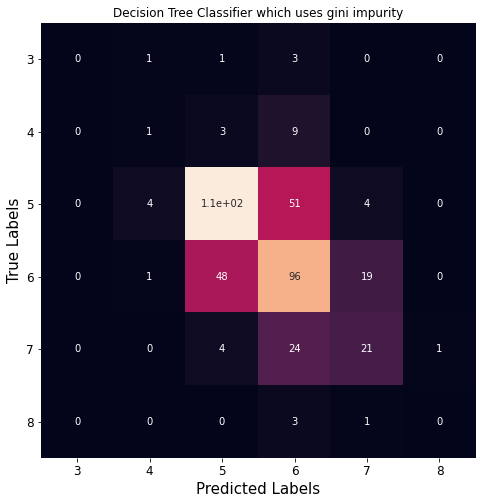

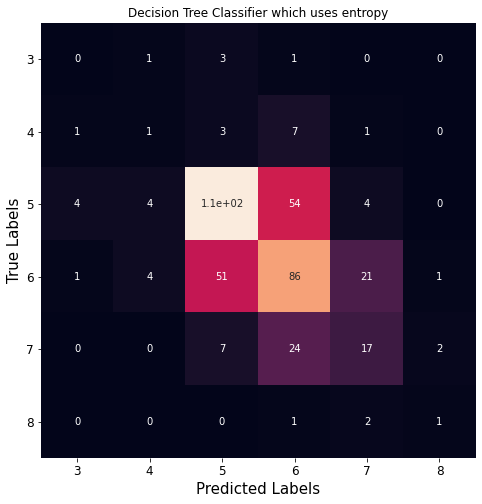

In [45]:

from sklearn.metrics import confusion_matrix

#Decision Tree classifier #1 (uses gini) and #2 (uses entropy)
categories = [3,4,5,6,7,8]
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_1)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_title('Decision Tree Classifier which uses gini impurity')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_2)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_title('Decision Tree Classifier which uses entropy')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()



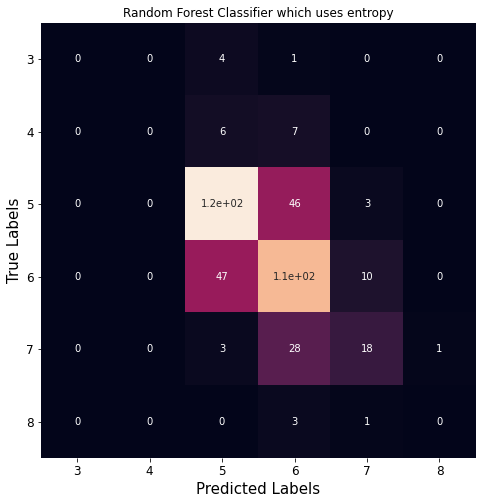

In [46]:
#Random Forest Classifier
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_rfc)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_title('Random Forest Classifier which uses entropy')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

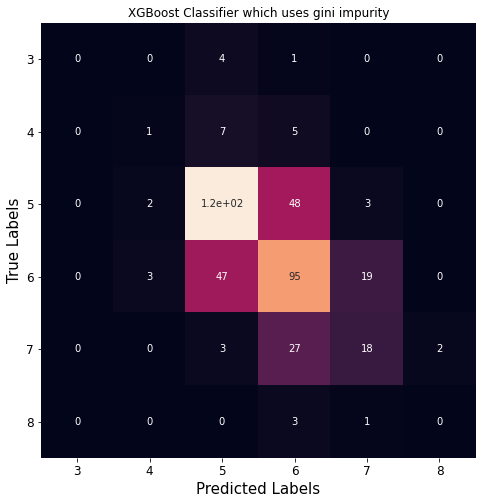

In [47]:
#XGBoost Classifier
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test_xgb, best_predict)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_title('XGBoost Classifier which uses gini impurity')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Final Predictions and findings 
1. As we talked about earlier, the quality label we are using here is severely imbalanced. We have a lot of data points whose qualities are 5, 6 and 7 and very few with 3, 4 and 8 quality. 
2. The imabalance shows that we do not have enough samples to represent and accurately find the features optimally to choose the quality of wines. 
4. Since the data is imabalnced, it also causes the features to overlap and not give an accurate understanding to differentiate between different wine qualities
3. The different algorithms we used allowed for classification across multipl labels, however becuase of the undersampling of certain labels (conversely, the oversampling of some other labels) does not allow for a very efficient algorithm. 
4. While the features vary in scale, we see that scaling them does not affect model performance, since our models are not distance or weight based.
5. The different models had almost the same metrics when evaluated for different scores like precision, accuracy et cetera. 
6. Since quality 5, 6 and 7 are heavily represented and 3,4,8 scarcely represented, it can be seen from the confusion matrixs of different models that most models incorrectly labeled the scarce labels as dense lables becuase we do not have enough information to represent each quality of wine.
7. The best model we got is a Random Forest Classifier. Since it uses mean accuracy by parallely running several decision trees, we are using the result which is the most preffered. Although, again, due to the imbalanced presence of labels, most decision trees label qualities as those which are in majority in the data. 


## What can we do:
1. The first thing we can do is gather more sample which are under-represented. That can be done via over-sampling the imbalanced data by using methods like SMOTE and then increase training set points
2. The second thing we can do is drop features which are clearly non-discernible and do not provide any info on the type of the qine (quality)
3. We can also try grouping the data as we did in the last model and over-sample it if there still is imbalance. 